<a href="https://colab.research.google.com/github/ahmedabex07/Cardiovascular-Health-Analysis/blob/main/Cardiovascular_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries for the Task

In [ ]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


# Connecting to Database

In [ ]:
# Connect to the database
conn = sqlite3.connect('cardiohealth.db')

# Create a cursor
cursor = conn.cursor()

# Get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()


for table in tables:
    print(table[0])



medical_examination


# Data Preprocessing and Manipulation

In [ ]:

# Describe the "medical_examination" table
table_name = 'medical_examination'
cursor.execute(f"PRAGMA table_info({table_name});")
table_info = cursor.fetchall()
print(f"Structure of table '{table_name}':")
for info in table_info:
    print(info)

# Retrieve a sample of data from the table
cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
data = cursor.fetchall()
print(f"Sample data from '{table_name}':")
for row in data:
    print(row)


Structure of table 'medical_examination':
(0, 'id', 'INTEGER', 0, None, 0)
(1, 'age', 'INTEGER', 0, None, 0)
(2, 'gender', 'INTEGER', 0, None, 0)
(3, 'height', 'INTEGER', 0, None, 0)
(4, 'weight', 'REAL', 0, None, 0)
(5, 'ap_hi', 'INTEGER', 0, None, 0)
(6, 'ap_lo', 'INTEGER', 0, None, 0)
(7, 'cholesterol', 'INTEGER', 0, None, 0)
(8, 'gluc', 'INTEGER', 0, None, 0)
(9, 'smoke', 'INTEGER', 0, None, 0)
(10, 'alco', 'INTEGER', 0, None, 0)
(11, 'active', 'INTEGER', 0, None, 0)
(12, 'cardio', 'INTEGER', 0, None, 0)
Sample data from 'medical_examination':
(0, 18393, 2, 168, 62.0, 110, 80, 1, 1, 0, 0, 1, 0)
(1, 20228, 1, 156, 85.0, 140, 90, 3, 1, 0, 0, 1, 1)
(2, 18857, 1, 165, 64.0, 130, 70, 3, 1, 0, 0, 0, 1)
(3, 17623, 2, 169, 82.0, 150, 100, 1, 1, 0, 0, 1, 1)
(4, 17474, 1, 156, 56.0, 100, 60, 1, 1, 0, 0, 0, 0)


In [ ]:
table_name = 'medical_examination'
cursor.execute(f"PRAGMA table_info({table_name});")
columns_info = cursor.fetchall()

# Extract and print the column names
column_names = [info[1] for info in columns_info]
print(f"Column names in the '{table_name}' table:")
print(column_names)


Column names in the 'medical_examination' table:
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [ ]:
# Create SQL queries to extract relevant information
query = """
SELECT age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio
FROM medical_examination
"""

# Load the query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Calculate BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)


In [ ]:
# Group by gender and calculate the mean age and BMI for each gender
gender_stats = df.groupby('gender').agg({'age': 'mean', 'bmi': 'mean'})
print("Gender statistics:\n", gender_stats)

Gender statistics:
                  age        bmi
gender                         
1       19509.944598  27.987480
2       19392.174112  26.754710
3       20053.181818  27.483293


In [ ]:
# Calculate the prevalence of cardiovascular disease
cardio_prevalence = df['cardio'].value_counts(normalize=True)
print("Cardiovascular disease prevalence:\n", cardio_prevalence)

Cardiovascular disease prevalence:
 0    0.5003
1    0.4997
Name: cardio, dtype: float64


# Data Analysis and Visualization

<ipython-input-16-f3dc44c0ad97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


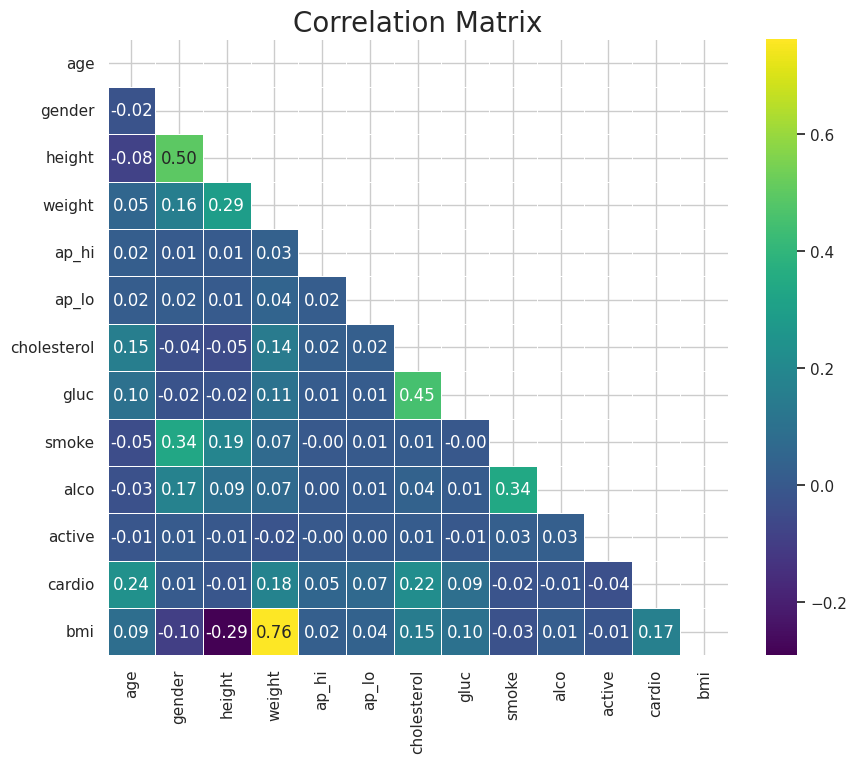

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the figure size and style
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

cmap = sns.diverging_palette(110, 50, as_cmap=True)
sns.heatmap(correlation_matrix, mask = mask, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=20)

plt.show()


**Result:**
Target field cardio is being affected by
*   weight
*   cholesterol
*   age
*   gluc

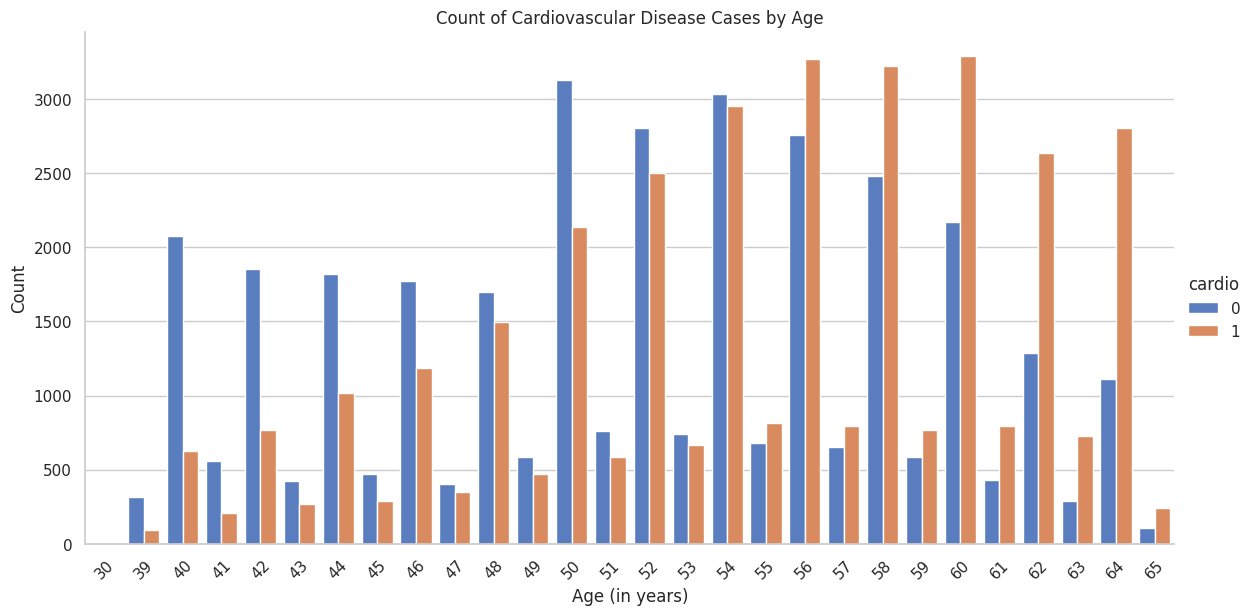

In [ ]:
# Create a new column 'years' for age in terms of years
df['years'] = (df['age'] / 365).round().astype('int')

custom_palette = sns.color_palette("muted")

# Use Seaborn's catplot to create the countplot
g = sns.catplot(x='years', hue='cardio', kind='count', data=df, palette=custom_palette, height=6, aspect=2)
g.set_axis_labels("Age (in years)", "Count")
g.set_xticklabels(rotation=45)

plt.title("Count of Cardiovascular Disease Cases by Age")
plt.show()

**Result:**
With increase in age, the risk of geeting cardiovascular disease increases. From above graph , we can see that people from age group 55-65 are more prone to cardiovascular diseases.
age has effect on cardio variable(taget).

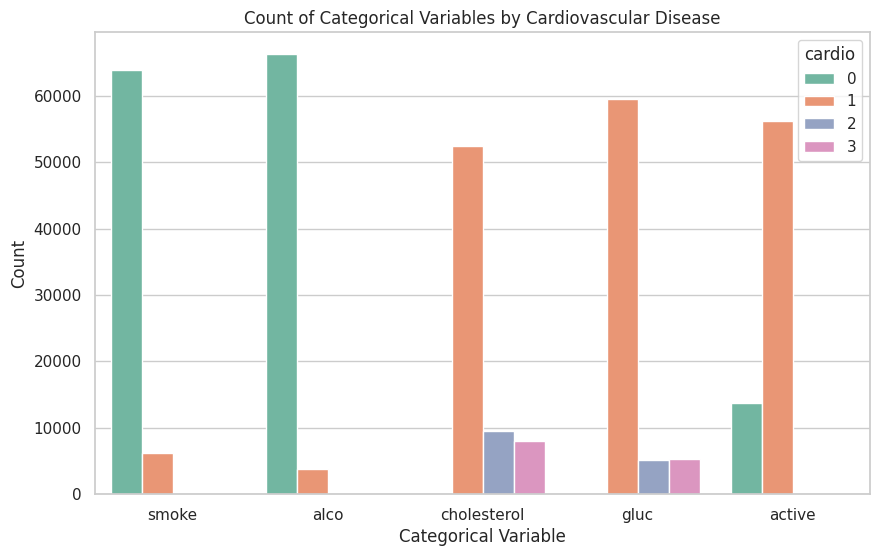

In [ ]:
plt.figure(figsize=(10, 6))

# Specify the categorical variables and the hue
categorical_vars = ['smoke', 'alco', 'cholesterol',  'gluc', 'active']
hue_var = 'cardio'

# Create a new DataFrame in the desired format
df_categorical = pd.melt(df, id_vars=[hue_var], value_vars=categorical_vars)

# Initialize a countplot
ax = sns.countplot(x="variable", hue="value", data=df_categorical, palette="Set2")

# Customize the plot as needed
ax.set_xlabel("Categorical Variable")
ax.set_ylabel("Count")
ax.set_title("Count of Categorical Variables by Cardiovascular Disease")

# Add a legend
leg = ax.legend(title=hue_var)
leg.set_title(hue_var)

# Show the plot
plt.show()

**Result:**
With more level of cholestrol and gluc, the possibility of cardiovascular disease increase.
Distribution of smoke and alco for cardio variable 0 and 1. This shows alco and smoke doesn't have much effect on cardio target variable.
Lesser the physical activiy, more prone to cardiovascular disease but the difference is not much significant.

<Figure size 1400x600 with 0 Axes>

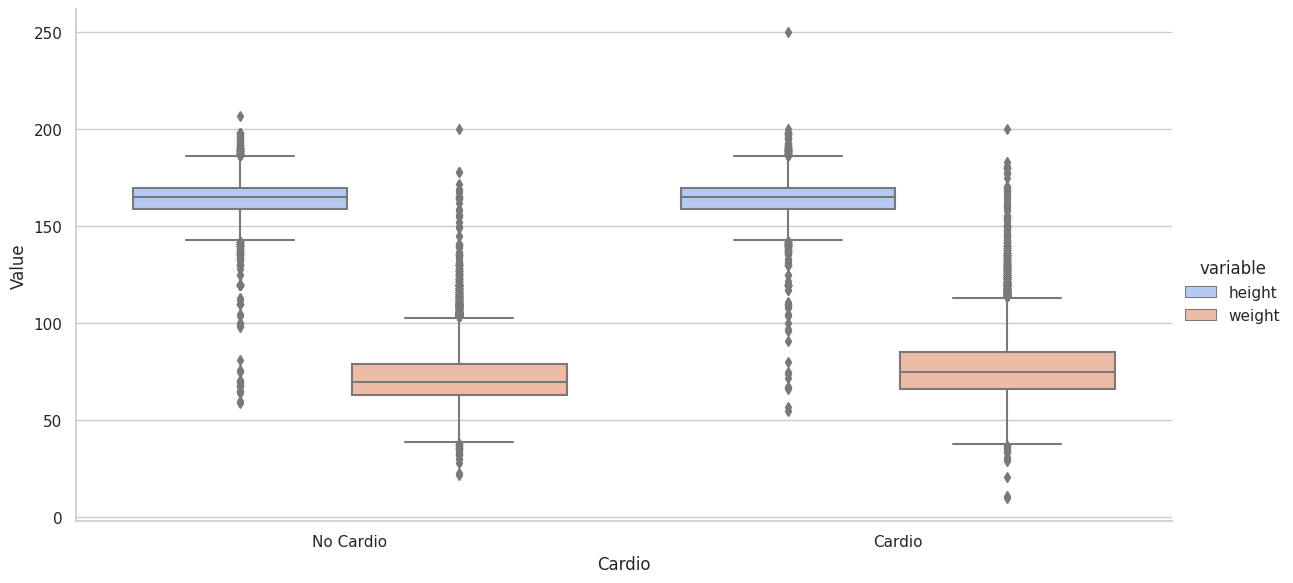

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Combine 'height' and 'weight' boxplots
g = sns.catplot(x='cardio', y='value', hue='variable', data=df.melt(id_vars='cardio', value_vars=['height', 'weight']), kind='box', palette='coolwarm', height=6, aspect=2)

# Customize the plot as needed
g.set_axis_labels("Cardio", "Value")
g.set_xticklabels(["No Cardio", "Cardio"])
g.set_titles("Boxplots of Height and Weight by Cardiovascular Disease")

# Show the plot
plt.show()

**Result:**
The above visualization showcase distribution of height and weight in respect with cardio target variable. For height, the distribution is similar for both cardio value 0 and cardio value 1. For weight, the of values weight distribution for cardio variable 1 is more than cardio variabl 0. This means,more the weight of the person , more is the possibility of cardiovascular disease.

*   height has no significant effect on cardio target variable.
*   weight has effect on cardio target variable.



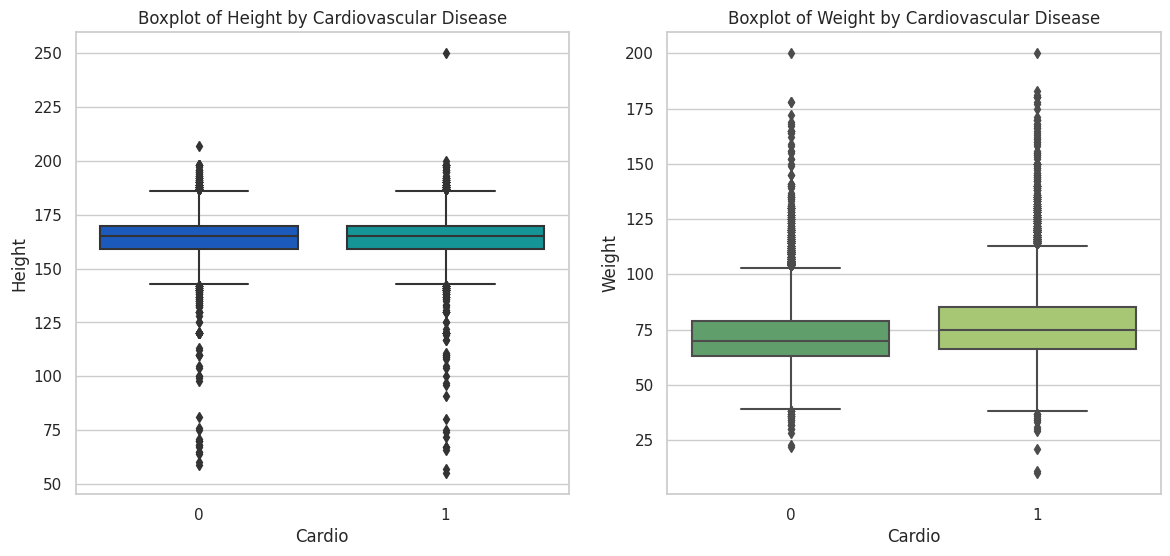

In [ ]:
plt.figure(figsize=(14, 6))

# Boxplot for 'height'
plt.subplot(1, 2, 1)
sns.boxplot(x='cardio', y='height', data=df, palette='winter')
plt.title("Boxplot of Height by Cardiovascular Disease")
plt.xlabel("Cardio")
plt.ylabel("Height")

# Boxplot for 'weight'
plt.subplot(1, 2, 2)
sns.boxplot(x='cardio', y='weight', data=df, palette='summer')
plt.title("Boxplot of Weight by Cardiovascular Disease")
plt.xlabel("Cardio")
plt.ylabel("Weight")

plt.show()

**Result:**
The above visulation showcase when systolic blood pressure is high, then there is more possibility of cardio vascular disease.
ap_hi (Systolic blood pressure) has effect on cardio variable targetvariable.

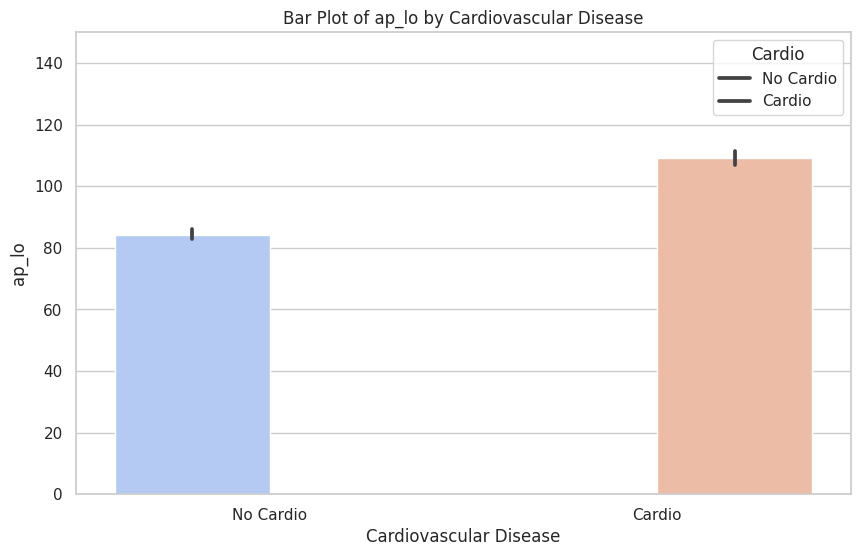

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(x='cardio', y='ap_lo', hue='cardio', data=df, palette="coolwarm")


plt.xlabel("Cardiovascular Disease")
plt.ylabel("ap_lo")
plt.title("Bar Plot of ap_lo by Cardiovascular Disease")
plt.xticks([0, 1], ["No Cardio", "Cardio"])
plt.legend(title="Cardio", labels=["No Cardio", "Cardio"])
ax.set_ylim(0, 150)

plt.show()

**Result:**
The above visulation showcase when systolic blood pressure is high, then there is more possibility of cardio vascular disease.
ap_hi (Systolic blood pressure) has effect on cardio variable targetvariable.

Text(0, 0.5, 'Cholesterol Level')

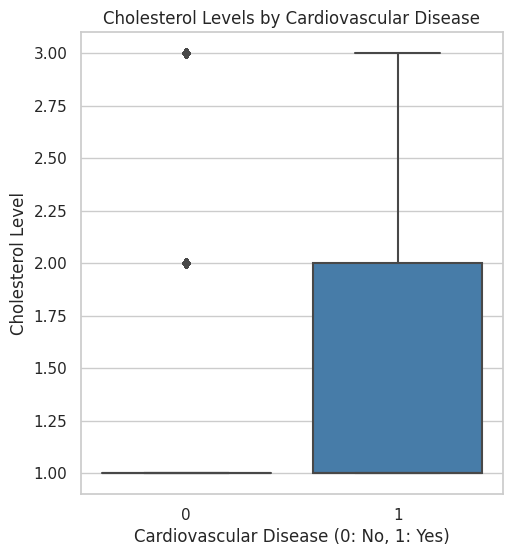

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='cardio', y='cholesterol', data=df, palette='Set1')
plt.title("Cholesterol Levels by Cardiovascular Disease")
plt.xlabel("Cardiovascular Disease (0: No, 1: Yes)")
plt.ylabel("Cholesterol Level")

**Result:**
The above visulation showcase when cholesterol level is high, then there is more possibility of cardio vascular disease.
ap_hi (Systolic blood pressure) has effect on cardio variable targetvariable.

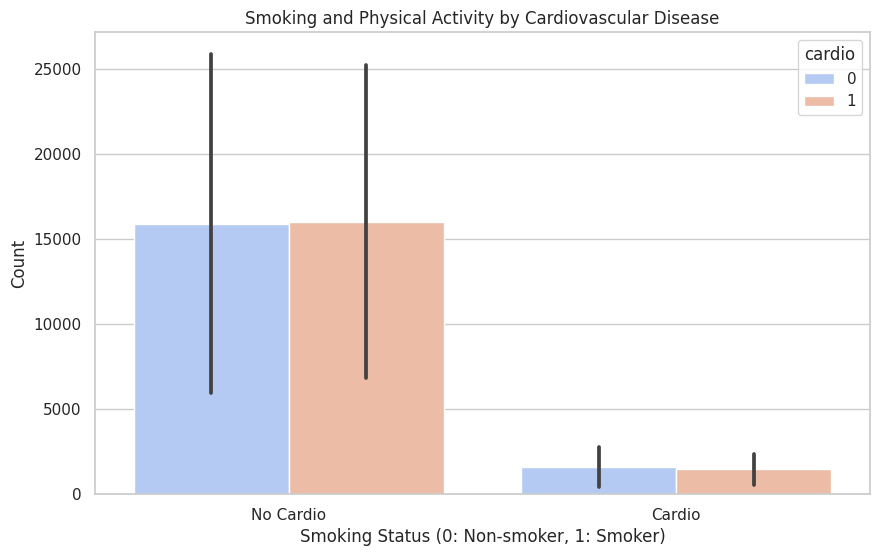

In [ ]:
plt.figure(figsize=(10, 6))
smoke_active_counts = df.groupby(['smoke', 'active', 'cardio']).size().unstack(fill_value=0).reset_index()
smoke_active_counts = smoke_active_counts.melt(id_vars=['smoke', 'active'], var_name='cardio', value_name='count')
sns.barplot(x='smoke', y='count', hue='cardio', data=smoke_active_counts, palette='coolwarm')
plt.title("Smoking and Physical Activity by Cardiovascular Disease")
plt.xlabel("Smoking Status (0: Non-smoker, 1: Smoker)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Cardio", "Cardio"])
plt.show()

**Result:**
The above visulation showcase a smoker has more possibility of being inflicted with cardio vascular disease then a non cmoker.
ap_hi (Systolic blood pressure) has effect on cardio variable targetvariable.